# Financial Time Series

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

In [2]:
import seaborn as sns

In [3]:
sns.set_theme()
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
filepath = './data/tr_eikon_eod_data.csv'

In [5]:
data = pd.read_csv(filepath, index_col = 0, parse_dates = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [6]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [7]:
data.shape

(1972, 12)

In [8]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

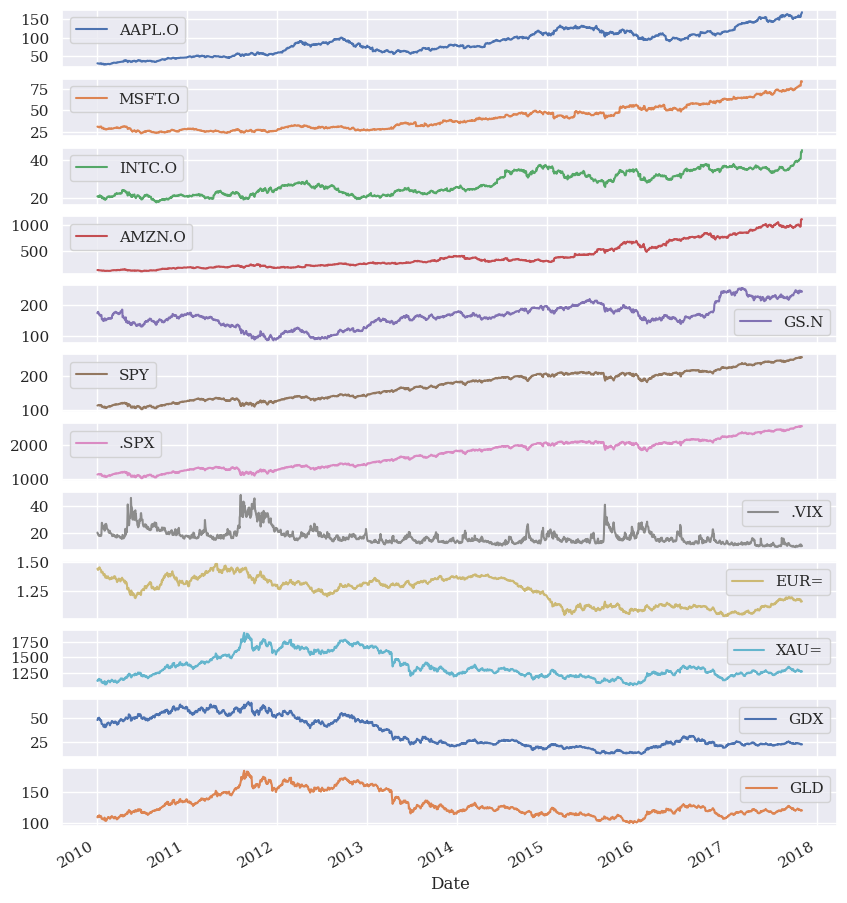

In [9]:
data.plot(figsize = (10,12), subplots = True)

 Data is from Thomson reuters (TR) Eikon Data API 
 called Reuters Instrument Codes (RIC)

In [10]:
instruments = ['Apple Stock', 'Microsoft Stock',
                       'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
                       'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
                       'VIX Volatility Index', 'EUR/USD Exchange Rate',
                       'Gold Price', 'VanEck Vectors Gold Miners ETF',
                       'SPDR Gold Trust']

In [11]:
for ric, name in zip(data.columns, instruments):
    print("{:8s} | {}".format(ric,name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [12]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [13]:
data.mean()

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

In [14]:
data.aggregate([min, np.mean, np.std, np.median, max])

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.190000,1.038500,1051.360000,12.470000,100.500000
mean,86.530152,40.586752,27.701411,401.154006,163.614625,172.835399,1727.538342,17.209498,1.252613,1352.471593,34.499391,130.601856
std,34.043491,14.394848,5.950847,257.115788,37.165334,42.325489,424.345659,5.918398,0.117224,195.383137,15.435140,19.455291
median,84.632058,36.540000,26.410000,306.425000,162.090000,178.805000,1783.810000,15.650000,1.288400,1288.820000,26.594000,123.895000
max,169.040000,83.890000,45.490000,1110.850000,252.890000,257.710000,2581.070000,48.000000,1.482600,1897.100000,66.630000,184.590000


### Tracking changes over time

In [15]:
# absolute differences

data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [16]:
data.diff().mean() #absolute changes are not optimal as they dependent on the scale of timeseries data itself

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

In [17]:
#percent changes

data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


<AxesSubplot: >

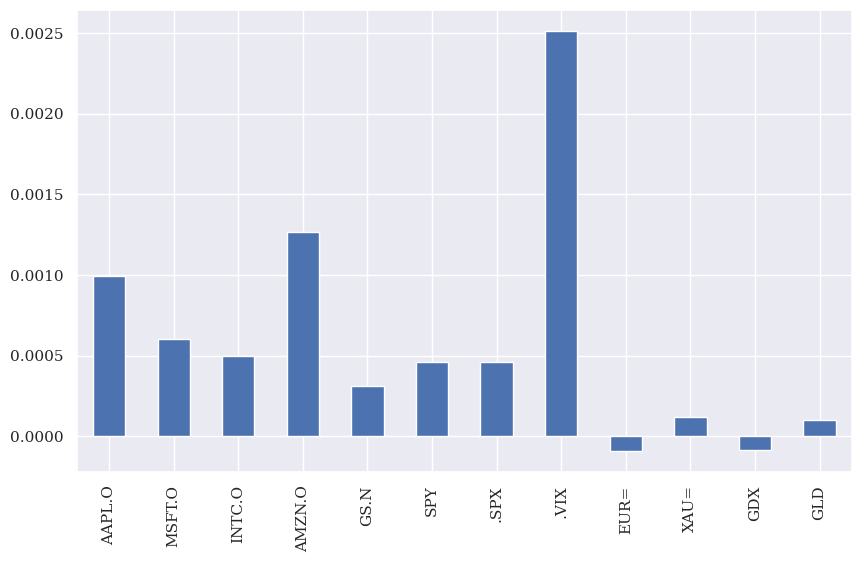

In [18]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

In [19]:
#log returns

rets = np.log(data/data.shift(1))
rets.head().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.00,0.00,-0.00,0.01,0.02,0.0,0.0,-0.04,-0.00,-0.00,0.01,-0.00
2010-01-06,-0.02,-0.01,-0.00,-0.02,-0.01,0.0,0.0,-0.01,0.00,0.02,0.02,0.02
2010-01-07,-0.00,-0.01,-0.01,-0.02,0.02,0.0,0.0,-0.01,-0.01,-0.01,-0.00,-0.01
2010-01-08,0.01,0.01,0.01,0.03,-0.02,0.0,0.0,-0.05,0.01,0.00,0.01,0.00


<AxesSubplot: xlabel='Date'>

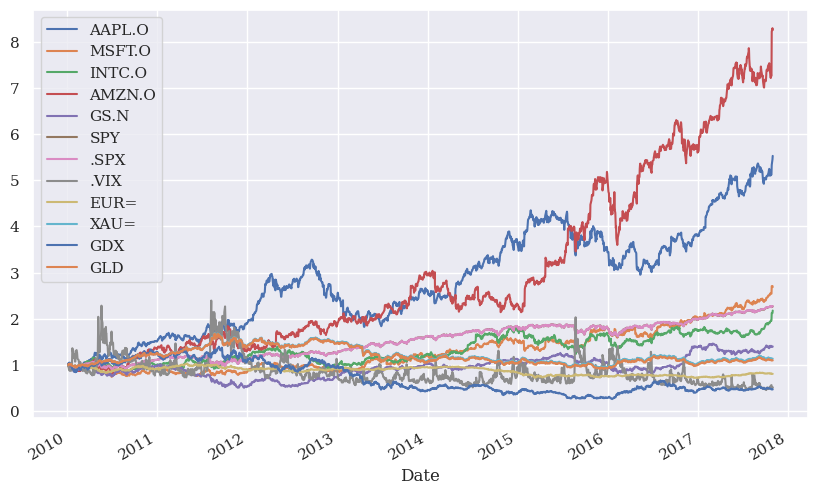

In [20]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

## Resampling

In [21]:
#downsampling

data.resample('1w', label = 'right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [22]:
data.resample('1m', label = 'right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


<AxesSubplot: xlabel='Date'>

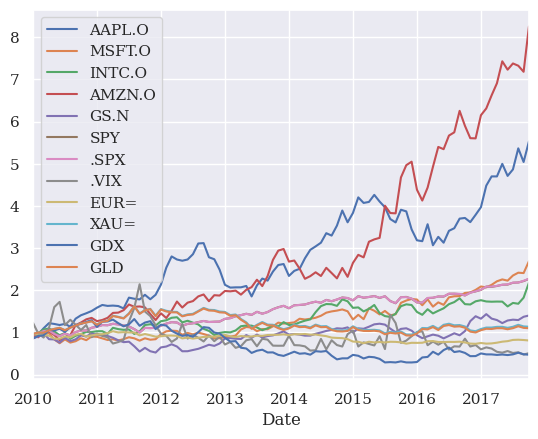

In [23]:
rets.cumsum().apply(np.exp).resample('1m', label = 'right').last().plot()

## Rolling Statistics

In [24]:
sym = 'AAPL.O'
apple = pd.DataFrame(data[sym]).dropna()
apple.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


In [25]:
w = 20
apple['min'] = apple[sym].rolling(window = w).min()
apple['mean'] = apple[sym].rolling(window = w).mean()
apple['std'] = apple[sym].rolling(window = w).std()
apple['median'] = apple[sym].rolling(window = w).median()
apple['max'] = apple[sym].rolling(window = w).max()
apple['ewma'] = apple[sym].ewm(halflife=0.5, min_periods = w).mean()

In [26]:
apple

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2017-10-25,156.410000,153.28,156.1580,2.009366,155.990,160.47,156.528352
2017-10-26,157.410000,153.48,156.3645,1.907676,156.085,160.47,157.189588
2017-10-27,163.050000,153.48,156.8110,2.348753,156.210,163.05,161.584897


<AxesSubplot: xlabel='Date'>

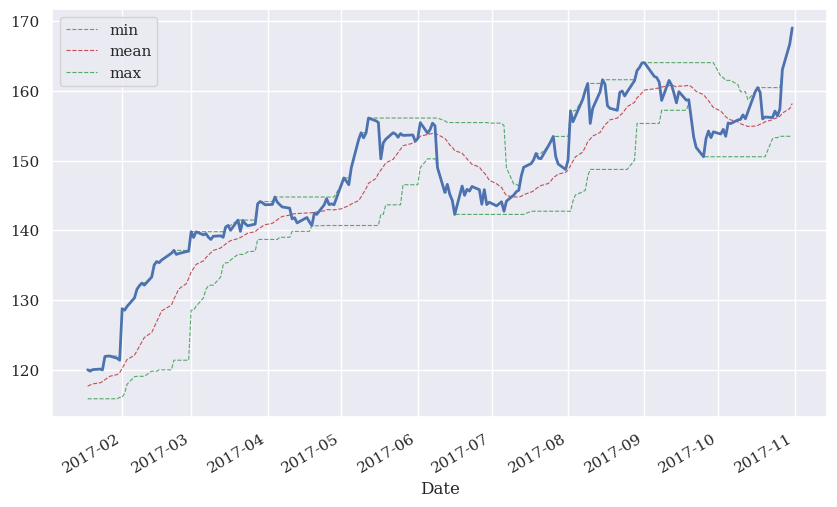

In [27]:
ax = apple[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10,6),
                                              style=['g--', 'r--', 'g--'],
                                              lw = 0.8)
apple[sym].iloc[-200:].plot(ax = ax, lw = 2.0)                                             

## Technical Analysis

In [37]:
apple['SMA1'] = apple[sym].rolling(window=42).mean()
apple['SMA2'] = apple[sym].rolling(window=252).mean()
apple[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


<AxesSubplot: xlabel='Date'>

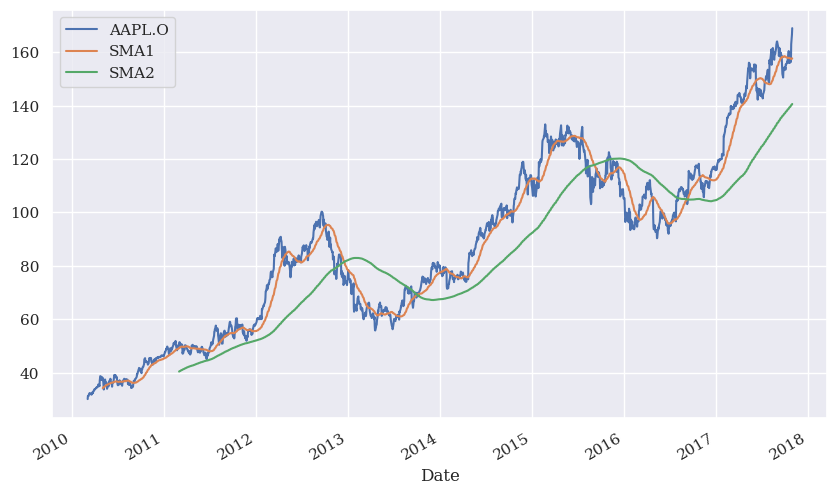

In [38]:
apple[[sym, 'SMA1', 'SMA2']].plot(figsize=(10,6))

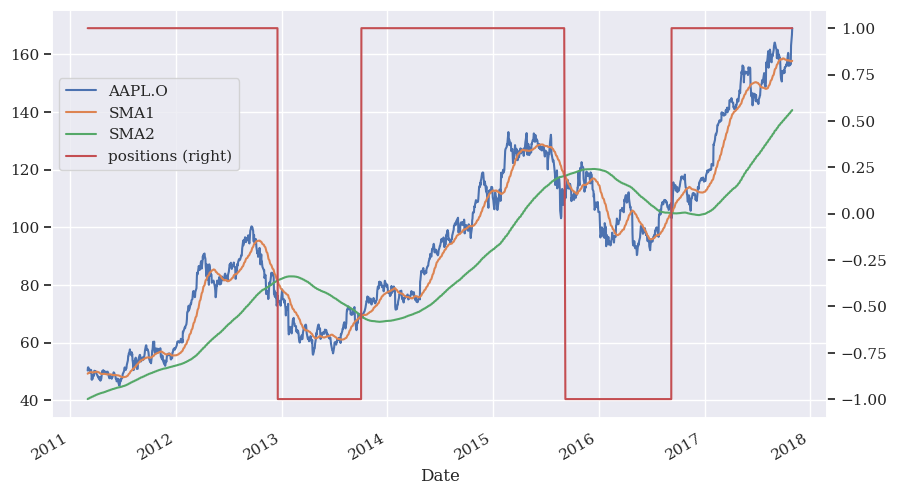

In [39]:
apple.dropna(inplace = True)
apple['positions'] = np.where(apple['SMA1'] > apple['SMA2'], 1, -1)
ax = apple[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Correlations Analysis

In [44]:
temp = data[['.SPX', '.VIX']]

In [45]:
temp.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

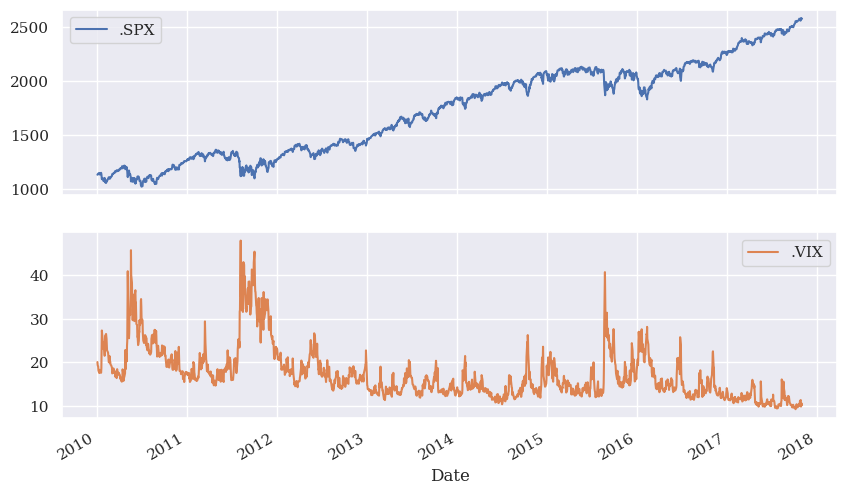

In [46]:
temp.plot(subplots = True, figsize = (10,6))

<AxesSubplot: xlabel='Date'>

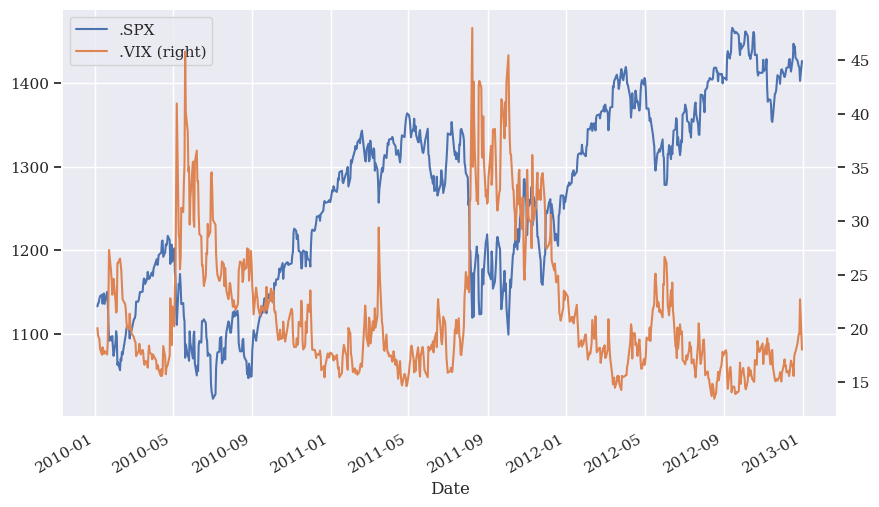

In [48]:
temp.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6))

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

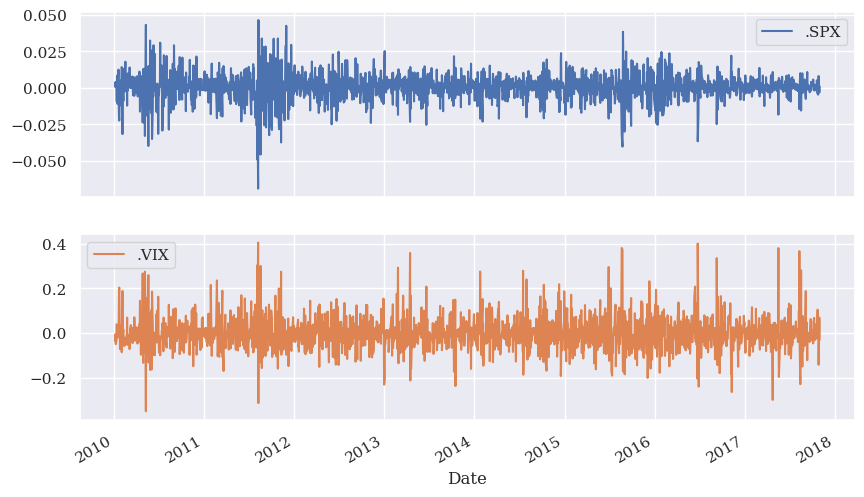

In [51]:
#logarithmic returns

rets = np.log(temp/temp.shift(1))
rets.head()
rets.dropna(inplace = True)
rets.plot(subplots = True, figsize=(10,6))

array([[<AxesSubplot: xlabel='.SPX', ylabel='.SPX'>,
        <AxesSubplot: xlabel='.VIX', ylabel='.SPX'>],
       [<AxesSubplot: xlabel='.SPX', ylabel='.VIX'>,
        <AxesSubplot: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

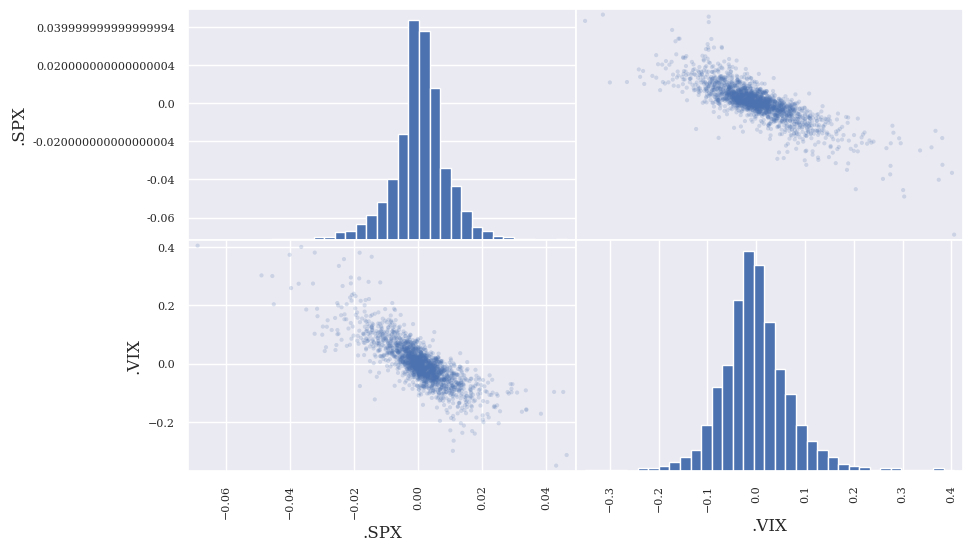

In [52]:
pd.plotting.scatter_matrix(rets, alpha = 0.2, diagonal = 'hist',
                          hist_kwds = {'bins': 35},
                          figsize = (10,6))

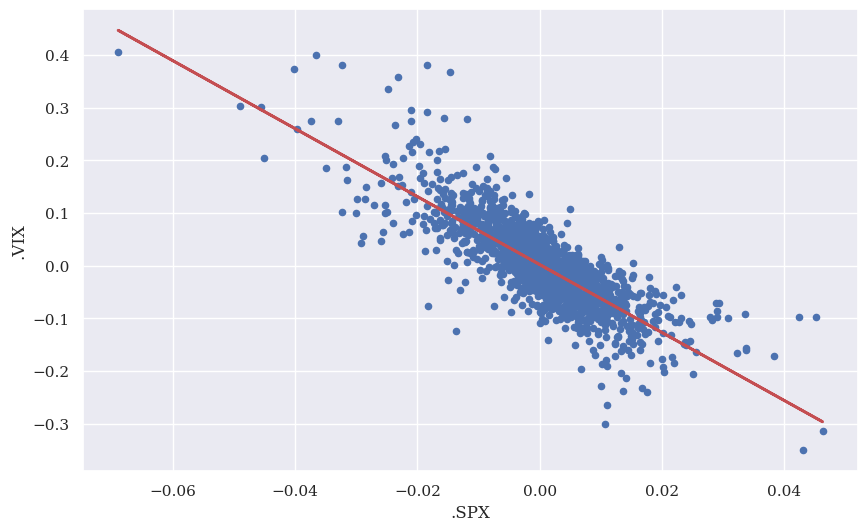

In [53]:
#regression
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg =1)
ax = rets.plot(kind = 'scatter', x = '.SPX', y = '.VIX', figsize=(10,6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw = 2)

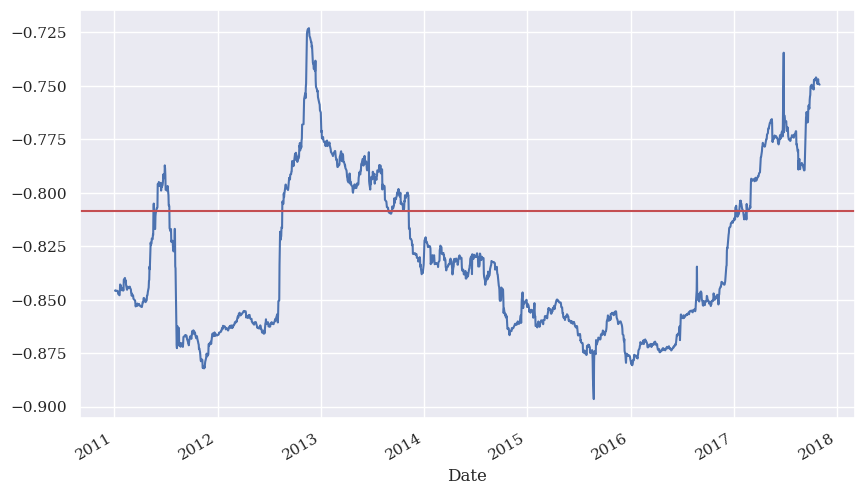

In [55]:
#correlation
rets.corr()
ax = rets['.SPX'].rolling(window=252).corr(
                           rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')